In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def load_data(path = 'data/HadCRUT5.0Analysis_gl.txt'):

    with open(path, 'r') as file:
        data = file.readlines()

    # we have alternating lines...
    data_1 = data[::2]
    data_2 = data[1::2]

    data_1 = [data_1[i].split() for i in range(len(data_1))]
    data_2 = [data_2[i].split() for i in range(len(data_2))]    
    data_1 = np.array(data_1).astype(float)
    data_2 = np.array(data_2).astype(float)

    df1 = pd.DataFrame(data_1)
    df2 = pd.DataFrame(data_2)


    df1.rename(columns={0: 'Year'}, inplace=True)
    df1.set_index('Year', inplace=True)

    df2.rename(columns={0: 'Year'}, inplace=True)
    df2.set_index('Year', inplace=True)

    monthly_values = df1
    percentage_coverage = df2

    # rename columns
    monthly_values.columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Annual']
    percentage_coverage.columns = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    # insert uncertainties in monthly_values
    monthly_values['Annual_uncertainty'] = monthly_values.values[:, :-1].std(axis=1)
    
    # correct last value of annual uncertainty
    # print(monthly_values.values[-1][:7])
    monthly_values['Annual_uncertainty'][2024] = np.std(monthly_values.values[-1][:7])

    return monthly_values, percentage_coverage


monthly_values, percentage_coverage = load_data()
monthly_values.head(3)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual,Annual_uncertainty
Year,,,,,,,,,,,,,,
1850.0,-0.675,-0.333,-0.591,-0.589,-0.509,-0.344,-0.160,-0.208,-0.385,-0.533,-0.283,-0.404,-0.418,0.155349
1851.0,-0.201,-0.469,-0.646,-0.542,-0.198,-0.137,-0.097,-0.102,-0.091,-0.008,-0.082,-0.228,-0.233,0.196316
1852.0,-0.375,-0.477,-0.560,-0.585,-0.127,-0.084,0.005,-0.136,-0.002,-0.172,-0.305,0.065,-0.229,0.216206


In [7]:
monthly_values.tail(3)

,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,Annual,Annual_uncertainty
Year,,,,,,,,,,,,,,
2022.0,0.779,0.764,0.890,0.770,0.761,0.858,0.778,0.853,0.790,0.929,0.675,0.768,0.801,0.066009
2023.0,0.779,0.869,1.125,0.927,0.871,1.052,1.150,1.199,1.352,1.287,1.334,1.259,1.100,0.189849
2024.0,1.152,1.290,1.251,1.205,1.075,1.115,1.140,-9.999,-9.999,-9.999,-9.999,-9.999,1.175,0.070967


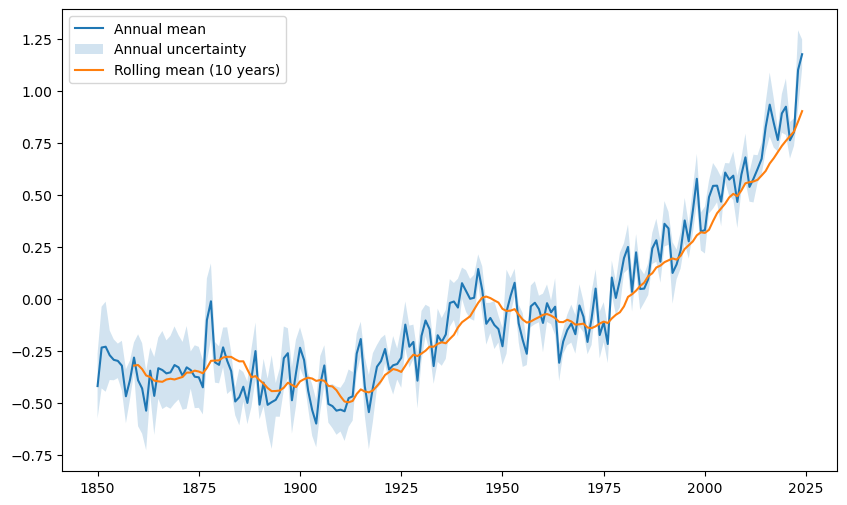

In [8]:
# plotting annual values
plt.figure(figsize=(10, 6))
plt.plot(monthly_values.index, monthly_values['Annual'], label='Annual mean')
plt.fill_between(monthly_values.index, monthly_values['Annual'] - monthly_values['Annual_uncertainty'], monthly_values['Annual'] + monthly_values['Annual_uncertainty'], alpha=0.2, label='Annual uncertainty')


# rolling mean
def rolling_mean(df, window=10):
    return df.rolling(window=window).mean()

window = 10
plt.plot(rolling_mean(monthly_values['Annual']), label=f'Rolling mean ({window} years)')

plt.legend()
plt.savefig('images/temperature_data_first_look.png')


In [9]:
# save processsed temperature data
monthly_values.to_csv('data/processed_temperature_data.csv')
